In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from scipy.stats import laplace
from scipy.stats import cauchy
from scipy.stats import johnsonsu
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import gaussian_kde

import statsmodels.api as sm  

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

import seaborn as sns
sns.set()

import datetime
import warnings
import itertools

In [2]:
btc = pd.read_csv('/Users/baoyechen/Desktop/Stats/Project/btc_price.csv')
btc

,Date,close
0,2010-08-16,0.0769
1,2010-08-18,0.0688
2,2010-08-19,0.0667
3,2010-08-20,0.0700
4,2010-08-21,0.0664
...,...,...
3910,2021-05-01,57796.6200
3911,2021-05-02,57857.5000
3912,2021-05-03,56610.4600
3913,2021-05-04,57213.3300


In [3]:
btc = btc.set_index('Date')

## Overview of the Data

In [4]:
btc.describe()

,close
count,3915.000000
mean,4486.874664
std,9240.883542
min,0.060000
25%,93.488915
50%,581.070000
75%,6607.448333
max,63554.440000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


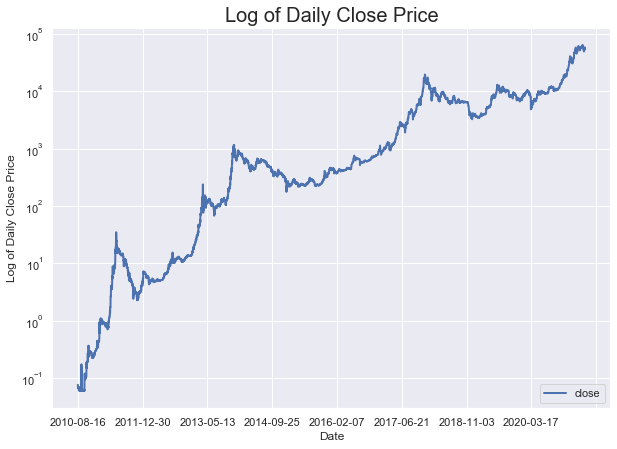

In [10]:
sns.set(rc={'figure.figsize':(10, 7)})
figure1 = btc.close.plot(logy=True, linewidth=2)
plt.legend(loc='lower right')
plt.xlabel('Date')
plt.ylabel('Log of Daily Close Price')
plt.title("Log of Daily Close Price", size=20)
plt.savefig("raw_time_series.eps")

## Add a Return Column

In [12]:
# return = p_t/p_{t-1} - 1
btc['returns'] = (btc['close'].pct_change() + 1)
btc.head()

,close,returns
Date,,
2010-08-16,0.0769,NaN
2010-08-18,0.0688,0.894668
2010-08-19,0.0667,0.969477
2010-08-20,0.0700,1.049475
2010-08-21,0.0664,0.948571


In [27]:
sns.set(rc={'figure.figsize':(10, 7)})

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


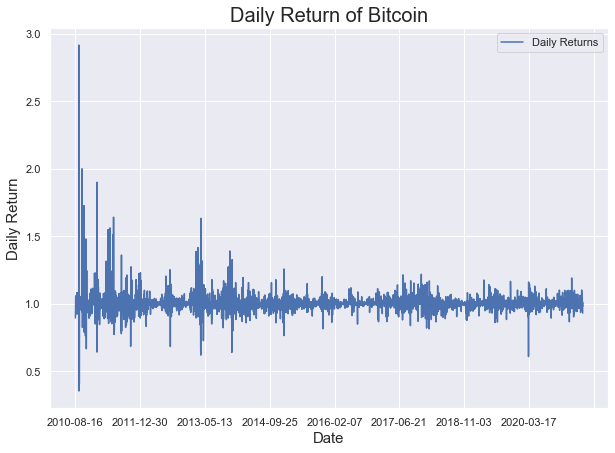

In [28]:
figure2 = btc.returns.plot(label='Daily Returns')
plt.legend(loc='upper right')
plt.xlabel('Date', size=15)
plt.ylabel('Daily Return', size=15)
plt.title("Daily Return of Bitcoin", size=20)
plt.savefig("raw_return.eps")

In [29]:
btc = btc['2012-01-01':]
btc

,close,returns
Date,,
2012-01-01,5.4999,1.230403
2012-01-02,5.2900,0.961836
2012-01-03,5.4500,1.030246
2012-01-04,6.3990,1.174128
2012-01-05,7.2200,1.128301
...,...,...
2021-05-01,57796.6200,1.078614
2021-05-02,57857.5000,1.001053
2021-05-03,56610.4600,0.978446


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


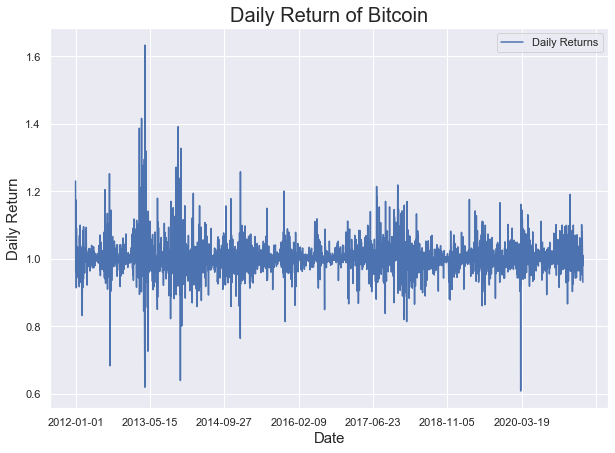

In [30]:

figure2 = btc.returns.plot(label='Daily Returns')
plt.legend(loc='upper right')
plt.xlabel('Date', size=15)
plt.ylabel('Daily Return', size=15)
plt.title("Daily Return of Bitcoin", size=20)
plt.savefig("processed_return.eps")

In [31]:
btc.describe()

,close,returns
count,3413.000000,3413.000000
mean,5146.172224,1.003985
std,9724.547168,0.050017
min,4.333330,0.608596
25%,248.080000,0.987472
50%,710.910000,1.001028
75%,7362.220000,1.018086
max,63554.440000,1.632936


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


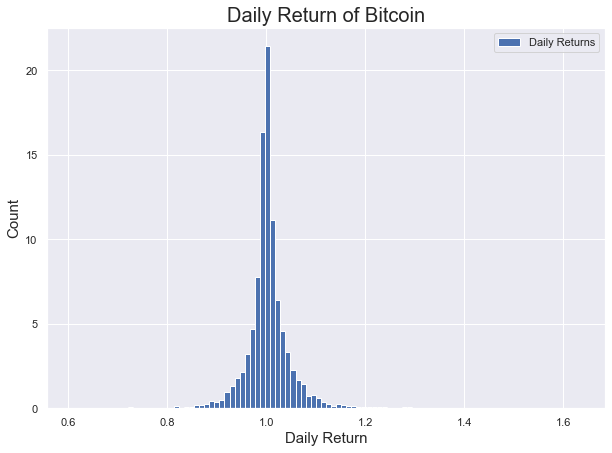

In [33]:

figure2 = btc.returns.hist(normed=1, bins=100, label='Daily Returns')
plt.legend(loc='upper right')
plt.xlabel('Daily Return', size=15)
plt.ylabel('Count', size=15)
plt.title("Daily Return of Bitcoin", size=20)
plt.savefig('return_hist.eps')

## Stationality Analysis

### ACF of the Daily Closing Price

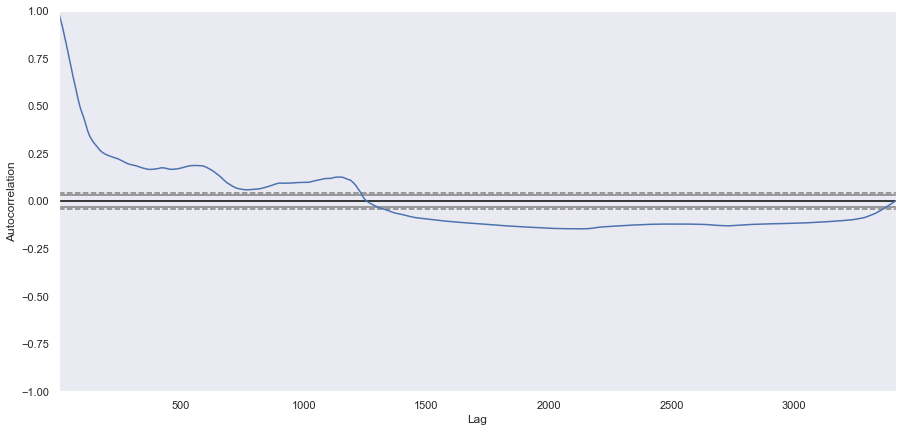

In [17]:
pd.plotting.autocorrelation_plot(btc.close)
plt.show()

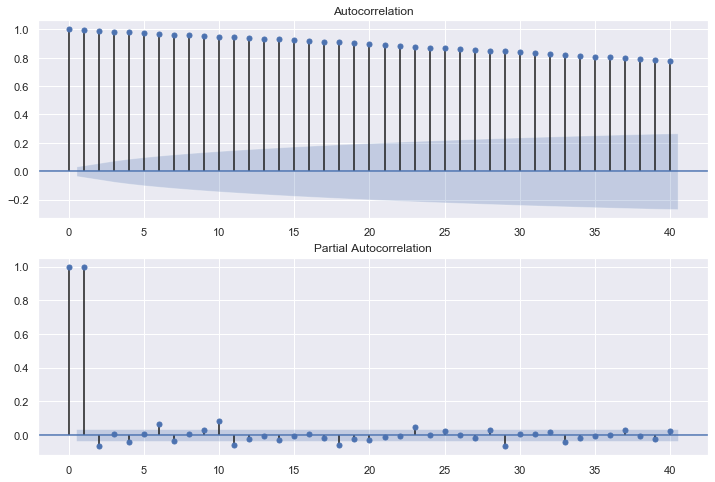

In [22]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(btc.close, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(btc.close, lags=40, ax=ax2)
plt.show()
fig.savefig('close_acf_pacf.png')

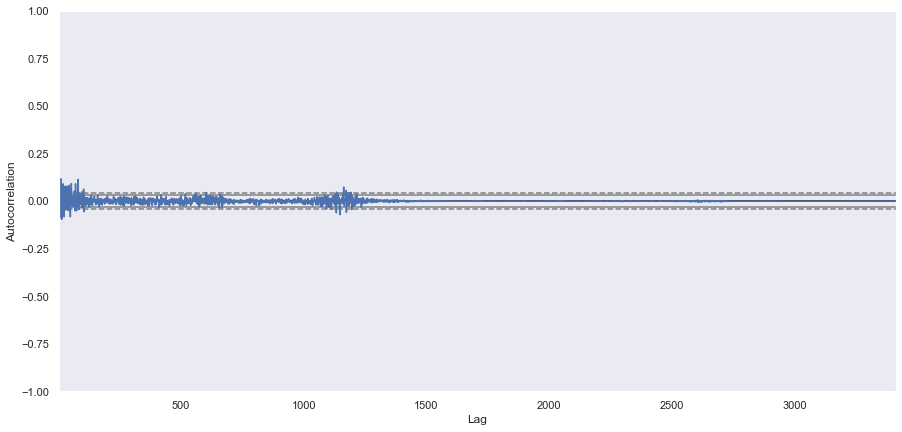

In [20]:
pd.plotting.autocorrelation_plot(btc.close.diff().dropna())
plt.show()

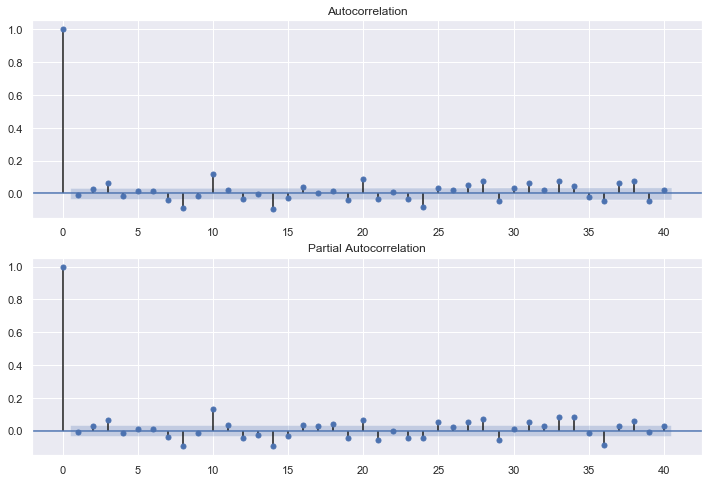

In [21]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(btc.close.diff().dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(btc.close.diff().dropna(), lags=40, ax=ax2)
plt.show()
fig.savefig('diff_close_acf_pacf.png')

### ACF of the Daily Returns

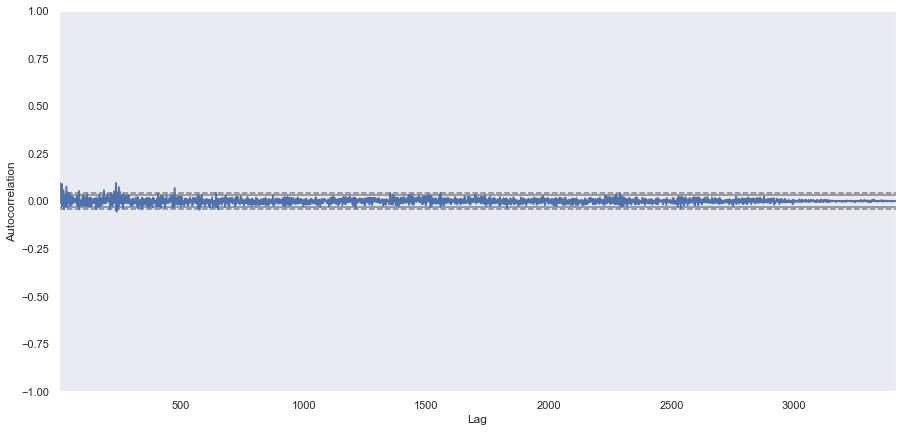

In [23]:
pd.plotting.autocorrelation_plot(btc.returns.dropna())
plt.show()

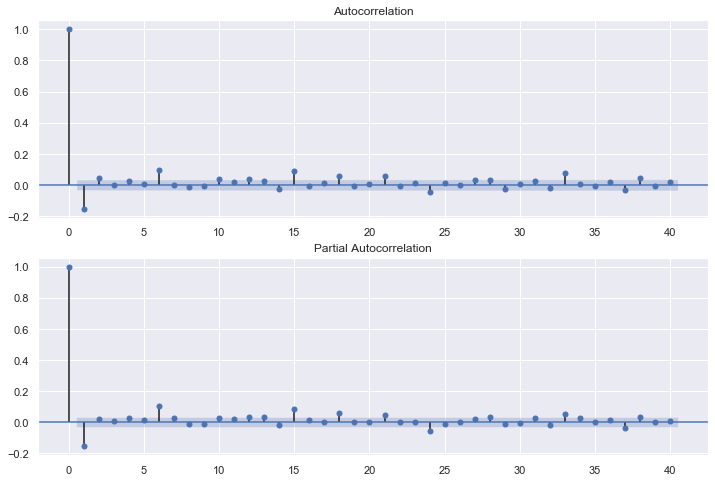

In [25]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(btc.returns.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(btc.returns.dropna(), lags=40, ax=ax2)
plt.show()
fig.savefig('return_acf_pacf.png')

When analyzing ACF of Daily Returns, we are essentially analyzing the stationality of the first differenced btc price. Therefore, we can conclude here the btc price is $I(1)$. This result is reasonable, as we can observe through the graph. 

### Tests for Stationality

In [26]:
test_for = []
test_stats = []
p_value = []

In [27]:
result = adfuller(btc.close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
test_for.append('Daily Close Price')
test_stats.append(result[0])
p_value.append(result[1])

ADF Statistic: 3.387267
p-value: 1.000000


In [28]:
result = adfuller(btc.close.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
test_for.append('Differenced Daily Close Price')
test_stats.append(result[0])
p_value.append(result[1])

ADF Statistic: -9.216125
p-value: 0.000000


In [29]:
result = adfuller(btc.returns.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
test_for.append('Returns')
test_stats.append(result[0])
p_value.append(result[1])

ADF Statistic: -9.733915
p-value: 0.000000


In [30]:
ADF_results = {
    'Tested Object':test_for,
    'Test Statistics':test_stats,
    'p-value':p_value
}

ADF = pd.DataFrame(ADF_results)
ADF

,Tested Object,Test Statistics,p-value
0,Daily Close Price,3.387267,1.000000e+00
1,Differenced Daily Close Price,-9.216125,1.831870e-15
2,Returns,-9.733915,8.853900e-17


In [31]:
ADF.to_csv("stationary_tests.csv")

These results can confirm that the bitcoin closing price is not statinoary, but its first difference is. So it is $I(1)$. Moreover, the return is also stationary.

## Analyze the Distribution of the Returns

### Fit to a Normal Distribution
From the graph above, we can see the return of bitcoin price looks like a normal distribution. Although not seen clearly in the graph, for financial data, the tail usually tends to be bigger, i.e., "fat tail." So it will be interesting to fit this data into a normal distribution and perform a test of normality.

rv.continuous.fit(): returns MLEs of parameters

In [38]:
# the first line of pct_change() will get NaN
# fill it to be 1
warnings.filterwarnings('ignore')
btc.returns = btc.returns.fillna(1)
parameters = norm.fit(btc.returns)
print("The fitted normal distribution has mean = " + str(parameters[0]) + " and standard deviation = " + str(parameters[1]))

The fitted normal distribution has mean = 1.0039847773157398 and standard deviation = 0.05000967893043455


In [39]:
x = np.linspace(min(btc.returns), max(btc.returns), 100)
# loc and scale corresponds to mean and standard deviation
fitted_line = norm.pdf(x, loc=parameters[0], scale=parameters[1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


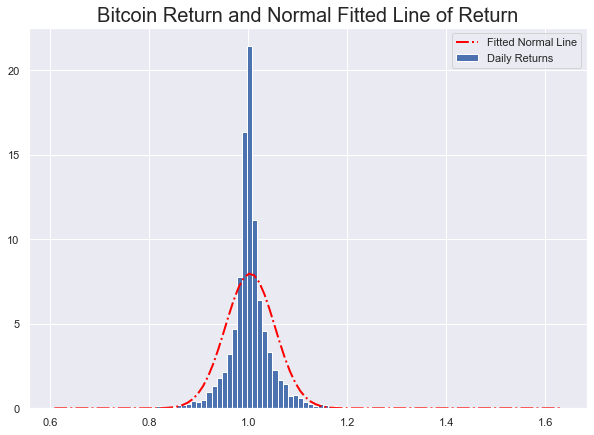

In [40]:
# Plot the real return and the fitted line together
figure3 = btc.returns.hist(normed=1, bins=100, label='Daily Returns')
plt.plot(x, fitted_line, color='red', label='Fitted Normal Line', linestyle='dashdot', linewidth=2)
plt.title('Bitcoin Return and Normal Fitted Line of Return', size=20)
plt.legend(loc='upper right')
plt.savefig("fit_normal.eps")
plt.show()

In [40]:
stats.kstest(btc.returns, 'norm', args=parameters)

KstestResult(statistic=0.14236730196202263, pvalue=1.6418475338732905e-60)

By observing this graph, we can see the data looks "pointy," so I decided to fit it to a Laplace distribution instead.

### Fit to a Laplace Distribution

In [41]:
parameters = laplace.fit(btc.returns)
print("The fitted laplace distribution has mean = " + str(parameters[0]) + " and scale = " + str(parameters[1]))

The fitted laplace distribution has mean = 1.0010279593951514 and scale = 0.028857698278610056


In [42]:
x = np.linspace(min(btc.returns), max(btc.returns), 100)
# loc and scale corresponds to mean and standard deviation
fitted_line = laplace.pdf(x, loc=parameters[0], scale=parameters[1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


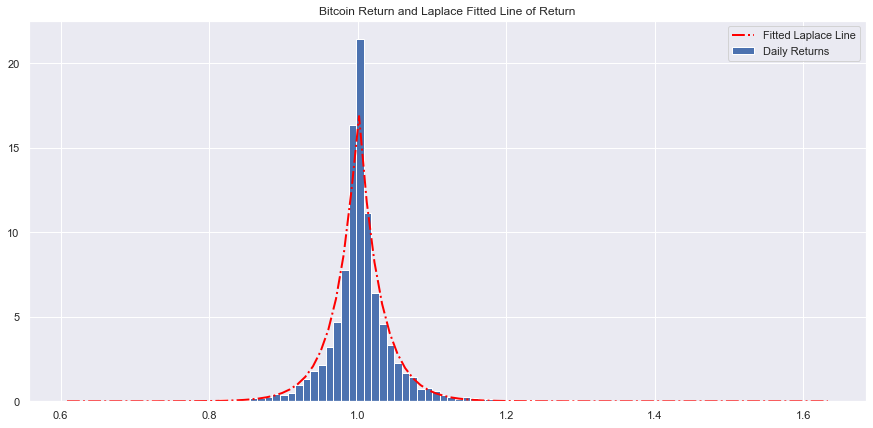

In [43]:
# Plot the real return and the fitted line together
sns.set(rc={'figure.figsize':(15, 7)})
figure3 = btc.returns.hist(normed=1, bins=100, label='Daily Returns')
plt.plot(x, fitted_line, color='red', label='Fitted Laplace Line', linestyle='dashdot', linewidth=2)
plt.title('Bitcoin Return and Laplace Fitted Line of Return')
plt.legend(loc='upper right')
plt.savefig('fit_laplace.eps')
plt.show()

In [44]:
stats.kstest(btc.returns, 'laplace',args=parameters)

KstestResult(statistic=0.06720342846516258, pvalue=8.174906169097284e-14)

We can see it fits MUCH BETTER to a Laplace Distribution, although it still cannot pass the kstest.

### Fit it to Cauchy Distribution

In [45]:
parameters = cauchy.fit(btc.returns)
print("The fitted Cauchy distribution has location = " + str(parameters[0]) + " and scale = " + str(parameters[1]))

The fitted Cauchy distribution has location = 1.0009626332902442 and scale = 0.014536382954223038


In [46]:
x = np.linspace(min(btc.returns), max(btc.returns), 100)
# loc and scale corresponds to mean and standard deviation
fitted_line = cauchy.pdf(x, loc=parameters[0], scale=parameters[1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


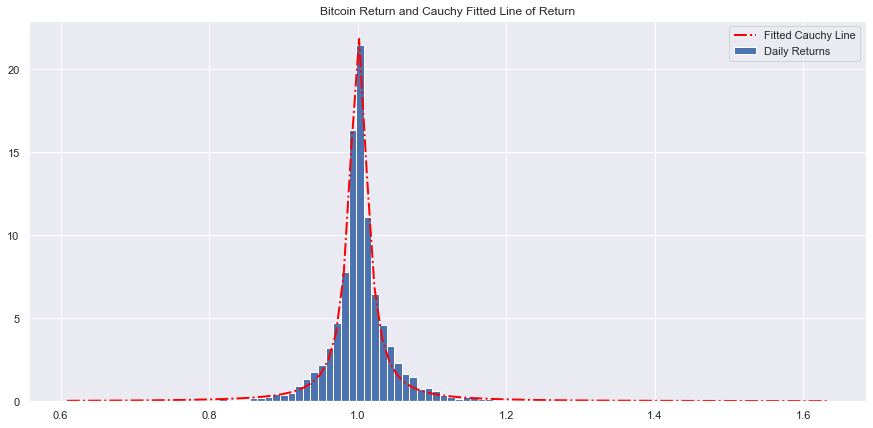

In [48]:
# Plot the real return and the fitted line together
sns.set(rc={'figure.figsize':(15, 7)})
figure4 = btc.returns.hist(normed=1, bins=100, label='Daily Returns')
plt.plot(x, fitted_line, color='red', label='Fitted Cauchy Line', linestyle='dashdot', linewidth=2)
plt.title('Bitcoin Return and Cauchy Fitted Line of Return')
plt.legend(loc='upper right')
plt.savefig("fit_cauchy.eps")
plt.show()

In [49]:
stats.kstest(btc.returns, 'cauchy', args=parameters)

KstestResult(statistic=0.0313397982539908, pvalue=0.002451062513674954)

It is also better than the normal, but it still cannot pass the kstest.

### Test for Normality

In [50]:
test = []
test_stats = []
test_pval = []
test_result = []

#### Shapiro-Wilk

In [51]:
sw_stats, sw_pval = shapiro(btc.returns)
print("Shapiro Stats = " + str(sw_stats) + " p-value = " + str(sw_pval))
test.append("Shapiro-Wilk Test")
test_stats.append(sw_stats)
test_pval.append(sw_pval)

Shapiro Stats = 0.8074904680252075 p-value = 0.0


In [52]:
test_result.append("Reject the Null Hypothesis: the data does not look normal.")

#### D'agostino's K^2 Test

In [53]:
Dagostino_stats, Dagostino_pval = normaltest(btc.returns)
print("D'agostino's K^2 Stats = " + str(Dagostino_stats) + " p-value = " + str(Dagostino_pval))
test.append("D'agostino's K^2 Test")
test_stats.append(Dagostino_stats)
test_pval.append(Dagostino_pval)

D'agostino's K^2 Stats = 1300.476345204041 p-value = 4.0285588852535995e-283


In [54]:
test_result.append("Reject the Null Hypothesis: the data does not look normal.")

#### Anderson-Darling Test

In [55]:
Anderson_stats= anderson(btc.returns)
print("Anderson Stats = " + str(Anderson_stats))
test.append("Anderson-Darling Test")
test_stats.append(Anderson_stats[0])
test_pval.append("Critical Values: " + str(Anderson_stats[1]))

Anderson Stats = AndersonResult(statistic=153.86475526362665, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [56]:
test_result.append("Reject the Null Hypothesis: the data does not look normal.")

In [57]:
normality_test = {
    'Test':test,
    'Test Stats':test_stats,
    'Test p-vale':test_pval,
    'Test result':test_result
}

normality_test_result = pd.DataFrame(normality_test)

normality_test_result

,Test,Test Stats,Test p-vale,Test result
0,Shapiro-Wilk Test,0.807490,0,Reject the Null Hypothesis: the data does not ...
1,D'agostino's K^2 Test,1300.476345,4.02856e-283,Reject the Null Hypothesis: the data does not ...
2,Anderson-Darling Test,153.864755,Critical Values: [0.575 0.655 0.786 0.917 1.091],Reject the Null Hypothesis: the data does not ...


In [58]:
normality_test_result.to_csv('normality_tests.csv')

So we can see, the data fails ALL THREE tests for normality. Therefore, although the data looks really normal/Gaussian in the graph, it does not really follow a normal distribution due to the problem of fat tails.

### Find the Best Fit

In [59]:
warnings.filterwarnings('ignore')

all_dists = ['alpha','anglit','arcsine','beta','betaprime','bradford','burr','burr12','cauchy','chi','chi2','cosine',
             'dgamma','dweibull','erlang','expon','exponnorm','exponweib','exponpow','f','fatiguelife','fisk','foldcauchy',
             'foldnorm','frechet_r','frechet_l','genlogistic','genpareto','gennorm','genexpon','genextreme','gausshyper',
             'gamma','gengamma','genhalflogistic','gilbrat','gompertz','gumbel_r','gumbel_l','halfcauchy','halflogistic',
             'halfnorm','halfgennorm','hypsecant','invgamma','invgauss','invweibull','johnsonsb','johnsonsu','kstwobign',
             'laplace','levy','levy_l','logistic','loggamma','loglaplace','lognorm','lomax','maxwell','mielke','nakagami',
             'ncx2','ncf','nct','norm','pareto','pearson3','powerlaw','powerlognorm','powernorm','rdist','reciprocal',
             'rayleigh','rice','recipinvgauss','semicircular','t','triang','truncexpon','truncnorm','tukeylambda',
             'uniform','vonmises','vonmises_line','wald','weibull_min','weibull_max']

test_stats = []
p_value = []

for i in all_dists:
    dist = getattr(stats, i)
    param = dist.fit(btc.returns)
    test = stats.kstest(btc.returns, i, args=param)
    test_stats.append(test[0])
    p_value.append(test[1])
    
goodness_of_fit = {
    'distribution':all_dists,
    'test statistics':test_stats,
    'p-value':p_value
}

goodness_of_fit_df = pd.DataFrame(goodness_of_fit)
goodness_of_fit_df

,distribution,test statistics,p-value
0,alpha,1.353033e-01,1.071724e-54
1,anglit,5.205357e-01,0.000000e+00
2,arcsine,4.842787e-01,0.000000e+00
3,beta,1.370979e-01,3.809732e-56
4,betaprime,1.354071e-01,8.846438e-55
...,...,...,...
82,vonmises,4.111988e+28,0.000000e+00
83,vonmises_line,1.000000e+00,0.000000e+00
84,wald,4.046243e-01,0.000000e+00
85,weibull_min,2.217837e-01,3.043942e-146


In [60]:
goodness_of_fit_df.sort_values(by=['p-value'])

,distribution,test statistics,p-value
42,halfgennorm,0.567964,0.000000
32,gamma,0.495314,0.000000
34,genhalflogistic,0.489786,0.000000
35,gilbrat,0.383189,0.000000
36,gompertz,0.541916,0.000000
...,...,...,...
80,tukeylambda,0.034683,0.000543
8,cauchy,0.031340,0.002451
22,foldcauchy,0.028748,0.007097
48,johnsonsu,0.021563,0.083673


In [61]:
goodness_of_fit_df.to_csv("finding_best_dist.csv")

In [42]:
parameters = johnsonsu.fit(btc.returns)
print("The fitted Johnson Su distribution has parameters:" + str(parameters))

The fitted Johnson Su distribution has parameters:(-0.0904093988363725, 0.7182370335732071, 0.9997037883937027, 0.013818811707351053)


In [43]:
x = np.linspace(min(btc.returns), max(btc.returns), 100)
# loc and scale corresponds to mean and standard deviation
fitted_line = johnsonsu.pdf(x, a=parameters[0], b=parameters[1], loc=parameters[2], scale=parameters[3])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


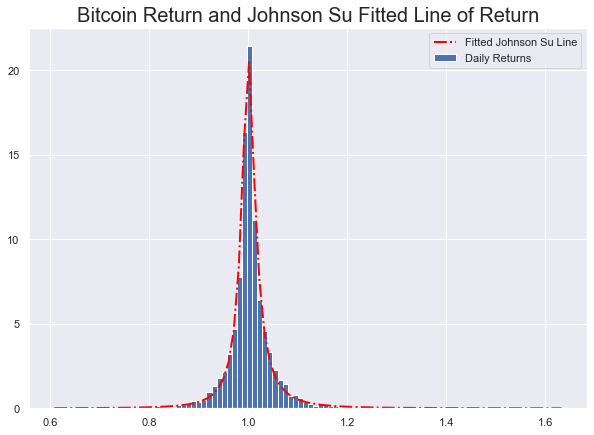

In [44]:
# Plot the real return and the fitted line together
figure5 = btc.returns.hist(normed=1, bins=100, label='Daily Returns')
plt.plot(x, fitted_line, color='red', label='Fitted Johnson Su Line', linestyle='dashdot', linewidth=2)
plt.title('Bitcoin Return and Johnson Su Fitted Line of Return', size=20)
plt.legend(loc='upper right')
plt.savefig('fit_johnsonsu.eps')
plt.show()

Johnson Su Distribution is the ONLY ONE that passes the kstest

## Simple Monte-Carlo Till the End of 2021

In [45]:
simulate_range = pd.date_range(start=datetime.date.today(), end='2021-12-31')

In [46]:
np.random.seed(100)    # Make the generated number predictable
simulated_return = np.random.choice(btc.returns, size=(len(simulate_range), 50000))      # randomly draw data from the return
simulation_result = pd.DataFrame(data=simulated_return, index=simulate_range)

In [47]:
simulation_result

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
2021-05-08,1.000383,0.999881,1.003793,0.977912,1.004437,1.006185,0.926596,0.987516,0.940138,1.017980,...,0.947368,1.031063,0.939482,1.012205,1.030671,1.020017,1.031098,1.009170,0.995984,1.011835
2021-05-09,0.991821,0.899854,0.964268,0.990909,0.999016,1.066509,1.071843,1.029941,0.992682,0.994997,...,0.964413,1.000087,0.999873,0.939779,0.990099,0.998555,0.968219,1.017301,0.902355,1.020626
2021-05-10,0.982336,0.948231,1.001433,0.995328,1.015303,1.006542,1.000000,1.047460,0.994727,1.013154,...,0.977556,1.082820,0.971062,1.015095,0.864277,0.953616,0.980173,0.955900,0.952392,0.991974
2021-05-11,1.037779,0.983933,1.007938,0.993615,1.076845,0.973302,1.012908,1.006454,1.116707,1.020329,...,1.000000,0.978599,1.030635,1.014329,0.968724,0.980967,0.993439,0.999373,1.035052,1.016401
2021-05-12,0.967388,1.168210,0.997426,1.016356,0.975646,0.995840,0.996410,0.997043,1.003622,0.997706,...,0.992334,0.993917,0.999848,0.985149,1.037304,0.932457,0.996598,0.990096,0.999682,1.032576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.986217,1.004437,1.024802,0.999682,0.976430,1.125473,1.021825,1.021429,0.999922,0.999752,...,1.068155,0.963266,0.951234,1.012972,0.982342,0.997968,0.977090,1.002311,1.003355,0.991965
2021-12-28,1.004183,1.042496,1.001188,1.000138,1.294863,0.996128,1.069599,1.004922,1.000000,1.002768,...,0.996318,1.006786,1.011440,0.962233,1.049261,1.000215,1.006867,0.997136,0.985647,1.204999
2021-12-29,0.992689,1.004564,0.976256,0.991592,0.959442,0.975562,0.955339,1.015249,1.020114,1.005168,...,1.001350,0.988780,0.997577,0.917820,1.010794,0.967726,0.977912,0.953464,0.858669,1.024629
2021-12-30,0.984108,1.000901,1.078723,1.010298,0.987031,0.973174,0.935603,0.994967,0.988405,0.914127,...,1.033598,1.004103,0.897144,1.025654,1.037596,1.025013,1.000097,1.069483,1.028869,1.012564


In [48]:
simulation_result.to_csv("simulation_to_1231_return.csv")

In [49]:
# Get the cumulative product of these simulated returns
cumulative_return = simulation_result.cumprod(axis=0)

In [50]:
cumulative_return

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
2021-05-08,1.000383,0.999881,1.003793,0.977912,1.004437,1.006185,0.926596,0.987516,0.940138,1.017980,...,0.947368,1.031063,0.939482,1.012205,1.030671,1.020017,1.031098,1.009170,0.995984,1.011835
2021-05-09,0.992200,0.899747,0.967926,0.969022,1.003449,1.073105,0.993166,1.017084,0.933258,1.012887,...,0.913654,1.031153,0.939363,0.951249,1.020466,1.018544,0.998328,1.026630,0.898731,1.032706
2021-05-10,0.974674,0.853168,0.969312,0.964494,1.018805,1.080125,0.993165,1.065355,0.928337,1.026211,...,0.893148,1.116553,0.912180,0.965608,0.881966,0.971300,0.978534,0.981356,0.855944,1.024417
2021-05-11,1.011496,0.839461,0.977007,0.958336,1.097095,1.051289,1.005985,1.072231,1.036680,1.047073,...,0.893148,1.092657,0.940124,0.979444,0.854382,0.952813,0.972113,0.980741,0.885947,1.041218
2021-05-12,0.978509,0.980666,0.974492,0.974011,1.070376,1.046915,1.002373,1.069060,1.040435,1.044671,...,0.886301,1.086010,0.939982,0.964898,0.886254,0.888457,0.968806,0.971028,0.885665,1.075137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,2.431324,1.216216,4.088042,2.998078,4.302346,3.118495,1.038627,2.149765,0.586319,0.181537,...,0.874044,0.531826,1.614864,1.489310,0.794233,1.768544,3.980590,3.333886,0.473341,3.078294
2021-12-28,2.441494,1.267901,4.092899,2.998493,5.570948,3.106422,1.110914,2.160345,0.586319,0.182039,...,0.870826,0.535435,1.633337,1.433063,0.833358,1.768924,4.007925,3.324336,0.466547,3.709340
2021-12-29,2.423645,1.273688,3.995716,2.973281,5.344999,3.030508,1.061300,2.193287,0.598112,0.182980,...,0.872001,0.529427,1.629380,1.315294,0.842353,1.711834,3.919397,3.169635,0.400609,3.800697
2021-12-30,2.385129,1.274836,4.310270,3.003900,5.275678,2.949213,0.992955,2.182248,0.591177,0.167267,...,0.901299,0.531600,1.461788,1.349037,0.874022,1.754653,3.919777,3.389869,0.412175,3.848448


In [51]:
cumulative_return.to_csv("simulation_to_1231_cumulative.csv")

### See some results of the simulations

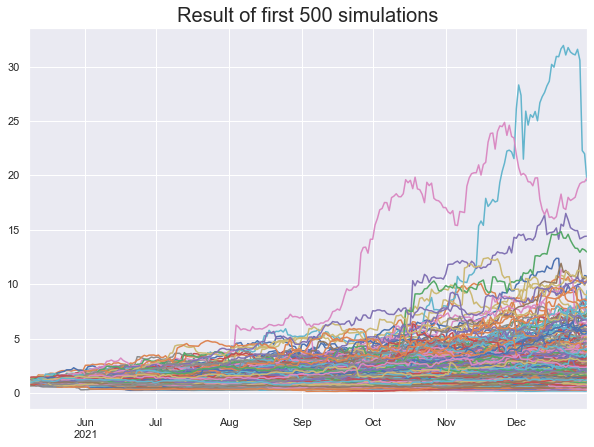

In [52]:
cumulative_return.iloc[:,:500].plot(legend=False, logy=False)
plt.title('Result of first 500 simulations', size=20)
plt.savefig('simulation_to_1231_first500.eps')

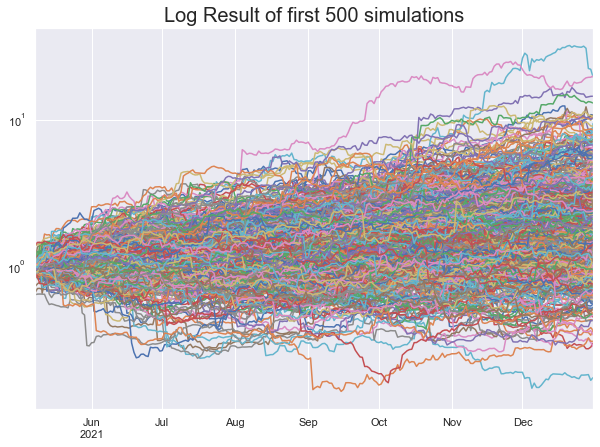

In [53]:
cumulative_return.iloc[:,:500].plot(legend=False, logy=True)
plt.title('Log Result of first 500 simulations', size=20)
plt.savefig('simulation_to_1231_log_first500.eps')

### Look at the Price Outcome of the Simulation

In [54]:
future_return = pd.DataFrame(data=cumulative_return, index=simulate_range)
future_prices = future_return*btc.close[-1]

In [55]:
possible_final_prices = future_prices.iloc[-1, :]
possible_final_prices.name = 'possible final prices'

In [56]:
future_prices

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
2021-05-08,53262.109361,53235.396402,53443.671724,52065.698072,53477.979655,53571.016166,49333.588463,52577.058972,50054.553089,54198.984270,...,50439.524211,54895.560673,50019.618500,53891.531730,54874.687182,54307.474866,54897.404923,53729.940405,53027.914668,53871.840871
2021-05-09,52826.458854,47904.077470,51534.019753,51592.373544,53425.349448,57133.975751,52877.840275,54151.285150,49688.262282,53927.836943,...,48644.526940,54900.346381,50013.280471,50646.113729,54331.373448,54229.013645,53152.698040,54659.542016,47849.981172,54983.020938
2021-05-10,51893.306522,45424.148495,51607.853838,51351.323470,54242.925036,57507.735771,52877.834559,56721.327806,49426.241647,54637.225868,...,47552.729548,59447.206233,48566.017596,51410.621822,46957.376639,51713.656428,52098.815526,52249.080625,45571.915655,54541.718451
2021-05-11,53853.794524,44694.323213,52017.528447,51023.461042,58411.238790,55972.420725,53560.377901,57087.409437,55194.625682,55747.957250,...,47552.729548,58174.957291,50053.838382,52147.291609,45488.749097,50729.414819,51756.977872,52216.345385,47169.319629,55436.262329
2021-05-12,52097.488616,52212.358729,51883.642010,51857.996841,56988.682014,55739.554574,53368.080995,56918.583132,55394.537479,55620.094963,...,47188.187535,57821.049996,50046.236171,51372.850259,47185.668338,47302.974374,51580.896129,51699.174957,47154.322250,57242.128615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,129447.862185,64753.453450,217654.403693,159622.855721,229064.301587,166034.052464,55298.307206,114457.162761,31216.616132,9665.332473,...,46535.606274,28315.337551,85978.112603,79293.405935,42286.356397,94160.309779,211933.441473,177501.798496,25201.475885,163893.658288
2021-12-28,129989.350001,67505.217541,217912.964027,159644.940225,296606.836678,165391.236323,59146.988768,115020.484364,31216.616132,9692.083107,...,46364.260102,28507.488059,86961.690041,76298.718277,44369.408267,94180.569552,213388.841942,176993.368744,24839.748559,197491.648118
2021-12-29,129039.046782,67813.343692,212738.774927,158302.581892,284576.945181,161349.456127,56505.437897,116774.383514,31844.500630,9742.170330,...,46426.851335,28187.622192,86750.989911,70028.494889,44848.313867,91140.967622,208675.433786,168756.823254,21329.134204,202355.659579
2021-12-30,126988.362406,67874.468833,229486.192283,159932.784795,280886.145694,157021.154770,52866.652433,116186.660354,31475.258379,8905.585066,...,47986.683839,28303.287753,77828.130127,71825.039815,46534.440528,93420.718992,208695.695504,180482.481568,21944.888109,204897.988926


In [57]:
future_prices.to_csv('simulation_to_1231_prices.csv')

In [58]:
possible_final_prices

0        126532.206770
1         68192.120368
2        227531.896077
3        161422.862004
4        283249.444618
             ...      
49995     95506.902374
49996    202633.085550
49997    191427.984797
49998     20782.001043
49999    206462.420671
Name: possible final prices, Length: 50000, dtype: float64

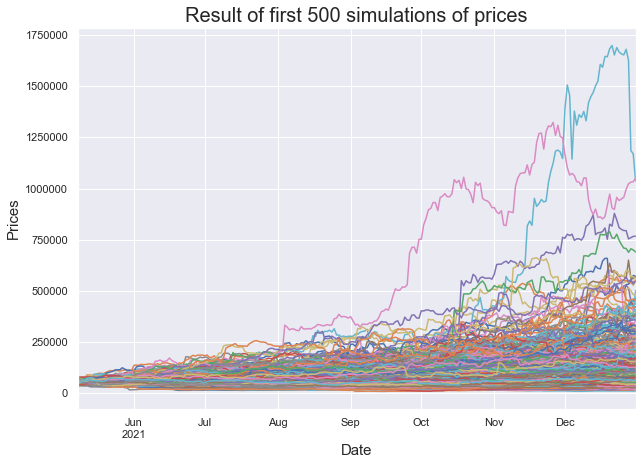

In [61]:
future_prices.iloc[:,:500].plot(legend=False, logy=False, grid=True)
plt.title('Result of first 500 simulations of prices', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Prices', size=15)
plt.savefig("simulation_to_1231_first500_prices.eps")

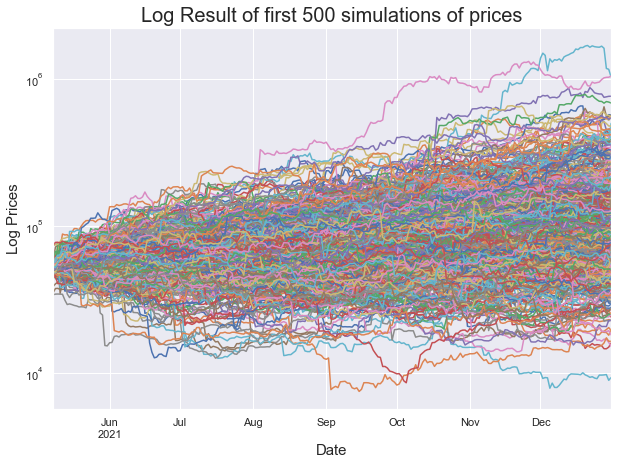

In [62]:
future_prices.iloc[:,:500].plot(legend=False, logy=True, grid=True)


plt.title('Log Result of first 500 simulations of prices', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Log Prices', size=15)

plt.savefig("simulation_to_1231_first500_logprices.eps",)

### Examing the Possible Prices at 2021-12-31

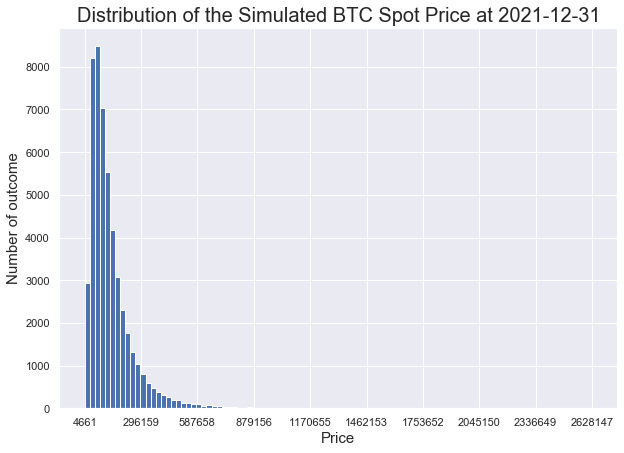

In [63]:
plt.hist(possible_final_prices, bins=100, density=False)

# set the x-ticks to be appropriate
xticks = plt.xticks()
ticks = np.linspace(min(possible_final_prices), max(possible_final_prices), 10)
plt.xticks(ticks, [str(int(tick)) for tick in ticks])

plt.xlabel('Price', size=15)
plt.ylabel('Number of outcome', size=15)
plt.title('Distribution of the Simulated BTC Spot Price at 2021-12-31', size=20)

plt.savefig("simulation_to_1231_final_prices_distribution.eps")

So most of the results are below $0$ and $10,0000$, which is a reasonable range.

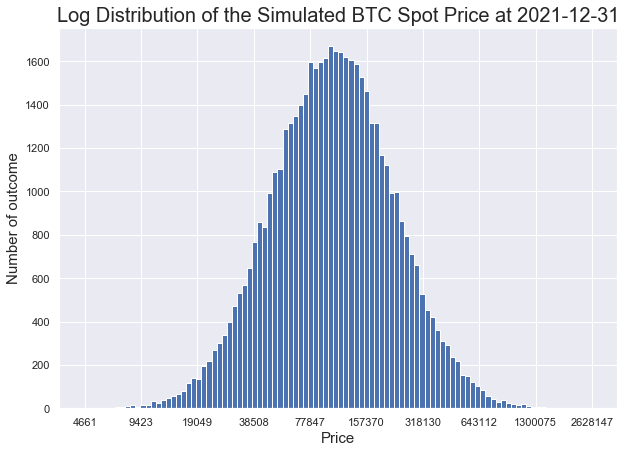

In [64]:
plt.hist(np.log(possible_final_prices), bins=100)

# set the x-ticks to be appropriate
xticks = plt.xticks()
ticks = np.linspace(min(np.log(possible_final_prices)), max(np.log(possible_final_prices)), 10)
plt.xticks(ticks, [str(int(np.exp(tick))) for tick in ticks])

plt.xlabel('Price', size=15)
plt.ylabel('Number of outcome', size=15)
plt.title('Log Distribution of the Simulated BTC Spot Price at 2021-12-31', size=20)

plt.savefig("simulation_to_1231_final_logprices_distribution.eps")

### Fit this to a Gaussian Kernel Distribution for Better Examination

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


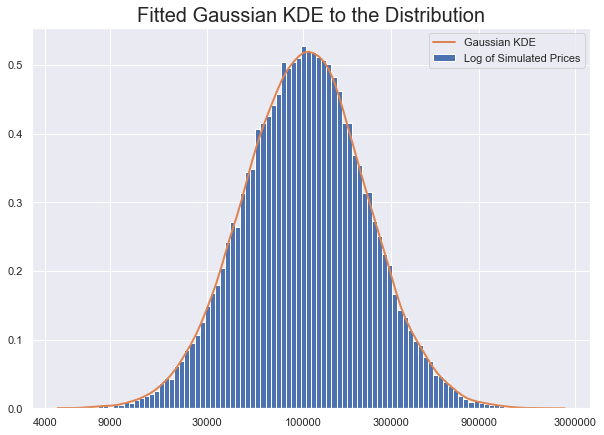

In [65]:
fig, ax = plt.subplots()
ax.hist(np.log(possible_final_prices), bins=100, density=True, label='Log of Simulated Prices')

xticks = plt.xticks()
ticks = [100, 4000, 9000, 30000, 100000, 300000, 900000, 3000000, 9000000]
ax.set_xticks(np.log(ticks))
ax.set_xticklabels([str(tick) for tick in ticks])

kde = gaussian_kde(np.log(possible_final_prices))
x = np.linspace(min(np.log(possible_final_prices)), max(np.log(possible_final_prices)), 100)
ax.plot(x, kde.pdf(x), linewidth=2, label='Gaussian KDE')
plt.title("Fitted Gaussian KDE to the Distribution", size=20)
ax.legend(loc='upper right')

plt.savefig("simulation_to_1231_kde.eps")

In [66]:
# Get the most likely outcome from the simulation
most_likely_outcome = np.exp(x[np.argmax(kde.pdf(x))])
most_likely_outcome

107198.58336507356

In [67]:
# Get the current bitcoin price
current = btc.close[-1]
current

53241.72

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


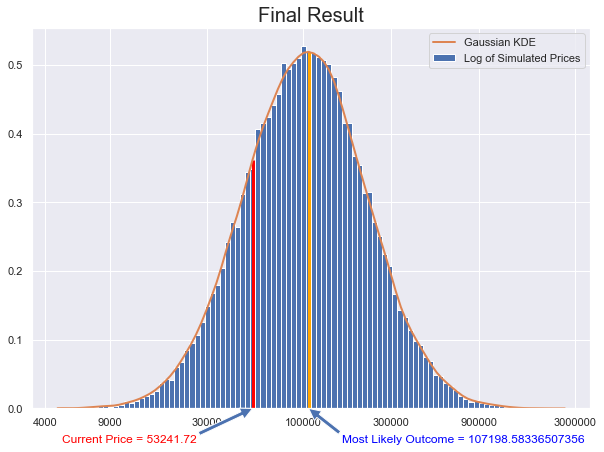

In [70]:
# Drow these two points onto the graph
fig, ax = plt.subplots()
ax.hist(np.log(possible_final_prices), bins=100, density=True, label='Log of Simulated Prices')

xticks = plt.xticks()
ticks = [100, 4000, 9000, 30000, 100000, 300000, 900000, 3000000, 9000000]
ax.set_xticks(np.log(ticks))
ax.set_xticklabels([str(tick) for tick in ticks])

kde = gaussian_kde(np.log(possible_final_prices))
x = np.linspace(min(np.log(possible_final_prices)), max(np.log(possible_final_prices)), 100)
ax.plot(x, kde.pdf(x), linewidth=2, label='Gaussian KDE')
ax.legend(loc='upper right')

ax.vlines(np.log(current), 0, kde.pdf(np.log(current)), linewidth=3, color='red')
ax.vlines(np.log(most_likely_outcome), 0, kde.pdf(np.log(most_likely_outcome)), linewidth=3, color='orange')
ax.annotate('Current Price = ' + str(current), xy=(np.log(current), 0), xytext=(8.5, -0.05), arrowprops=dict(shrink=0.0), color='red')
ax.annotate('Most Likely Outcome = ' + str(most_likely_outcome), xy=(np.log(most_likely_outcome), 0), xytext=(12, -0.05), arrowprops=dict(shrink=0.0), color='blue')

plt.title("Final Result", size=20)

plt.savefig('simulation_to_1231_final_result.eps')

From the graph, we can see that the probability of the final price at the end of this year being higher than the current price is quite large, which could be understood as an indication that the bullish market for Bitcoin is continuing. We can also quantify this probability by simply calculating the cdf:

In [71]:
probability = 1 - kde.integrate_box(0, np.log(current))
print("The probability that the final price at 2021-12-31 is higher than current price = " + str(probability))

The probability that the final price at 2021-12-31 is higher than current price = 0.8026644038278246


## Simulate From 2020 to Now

In [72]:
training = btc[:'2019-12-31']
training

,close,returns
Date,,
2012-01-01,5.4999,1.230403
2012-01-02,5.2900,0.961836
2012-01-03,5.4500,1.030246
2012-01-04,6.3990,1.174128
2012-01-05,7.2200,1.128301
...,...,...
2019-12-27,7194.4000,1.000234
2019-12-28,7243.9300,1.006885
2019-12-29,7301.0700,1.007888


In [73]:
simulate_range = pd.date_range(start='2020-01-01', end='2021-05-05')

In [74]:
np.random.seed(100)    # Make the generated number predictable
simulated_return = np.random.choice(training.returns, size=(len(simulate_range), 50000))      # randomly draw data from the return
simulation_result = pd.DataFrame(data=simulated_return, index=simulate_range)

In [75]:
simulation_result

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
2020-01-01,1.000383,0.999881,1.003793,0.977912,1.004437,1.006185,0.926596,0.987516,0.940138,1.017980,...,0.996109,0.961958,1.011545,1.000194,0.996355,0.984101,0.956304,0.971239,1.005899,1.006370
2020-01-02,0.981169,1.068155,1.018257,1.000740,0.999924,1.022346,0.977587,0.999561,1.632936,0.995886,...,1.002932,1.018290,1.023016,0.966918,1.099681,0.994344,1.003796,0.954443,0.987183,0.996954
2020-01-03,1.001073,1.003515,0.979021,1.017263,1.024963,0.996280,1.014074,1.000778,1.014130,0.976984,...,1.027180,1.009463,1.002669,0.999561,1.006143,0.996598,0.993639,0.997888,1.006042,0.997281
2020-01-04,0.961219,0.948425,1.001486,1.009852,1.000734,1.000740,1.006109,0.996756,1.055264,0.995514,...,0.996801,1.044069,1.025848,0.985664,1.066111,1.004103,0.987944,0.997322,0.931223,1.020329
2020-01-05,0.996082,0.981772,1.015076,1.000386,1.040731,0.988712,0.868076,0.995556,1.011835,1.011498,...,1.030106,1.045358,1.024521,1.013979,0.999954,0.957990,0.982497,1.001231,0.995542,1.002208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,0.981169,1.031969,0.976984,1.067704,1.012478,1.000144,1.021035,0.996691,0.987352,1.003007,...,0.980247,0.980034,1.031506,1.005148,0.985424,1.073496,1.005979,0.986208,0.983395,0.973098
2021-05-02,1.006661,1.072584,1.019826,1.031694,1.029941,1.007109,0.979317,0.998006,1.016496,0.997445,...,1.055264,1.016561,1.018257,0.990680,1.007816,0.981179,0.949052,0.991253,0.996945,0.969231
2021-05-03,1.031694,0.977401,1.010228,1.017591,1.016704,1.099681,0.869537,1.019855,1.066861,1.083821,...,0.966260,0.998956,0.988417,0.940876,0.964078,0.946000,1.024802,1.015964,0.887143,1.028880
2021-05-04,0.992024,0.988313,1.001731,0.960857,0.929757,1.033269,0.989112,1.001718,1.003015,0.998962,...,1.002240,0.887986,0.992807,1.002503,0.982336,0.979317,1.001029,0.999878,1.009091,1.026863


In [76]:
# Get the cumulative product of these simulated returns
cumulative_return = simulation_result.cumprod(axis=0)
cumulative_return

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
2020-01-01,1.000383,0.999881,1.003793,0.977912,1.004437,1.006185,0.926596,0.987516,0.940138,1.017980,...,0.996109,0.961958,1.011545,1.000194,0.996355,0.984101,0.956304,0.971239,1.005899,1.006370
2020-01-02,0.981545,1.068028,1.022120,0.978635,1.004361,1.028670,0.905829,0.987083,1.535185,1.013791,...,0.999030,0.979553,1.034827,0.967106,1.095672,0.978535,0.959934,0.926992,0.993006,1.003305
2020-01-03,0.982598,1.071782,1.000676,0.995529,1.029433,1.024843,0.918577,0.987851,1.556877,0.990458,...,1.026183,0.988823,1.037589,0.966682,1.102403,0.975206,0.953828,0.925034,0.999006,1.000577
2020-01-04,0.944492,1.016505,1.002163,1.005337,1.030189,1.025602,0.924189,0.984646,1.642917,0.986016,...,1.022901,1.032399,1.064409,0.952824,1.175284,0.979208,0.942328,0.922557,0.930298,1.020918
2020-01-05,0.940791,0.997977,1.017272,1.005726,1.072150,1.014025,0.802267,0.980271,1.662361,0.997352,...,1.053696,1.079227,1.090510,0.966143,1.175230,0.938072,0.925834,0.923692,0.926151,1.023172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,5.866389,1.215043,1.503703,15.453272,0.708561,1.156258,1.570317,11.686784,0.611838,2.316870,...,3.558523,4.583726,3.033799,14.365169,2.937832,8.809603,1.053637,2.192725,0.286290,2.149903
2021-05-02,5.905463,1.303236,1.533515,15.943048,0.729776,1.164478,1.537837,11.663482,0.621931,2.310951,...,3.755183,4.659638,3.089187,14.231287,2.960794,8.643794,0.999957,2.173546,0.285415,2.083752
2021-05-03,6.092631,1.273785,1.549200,16.223503,0.741966,1.280554,1.337207,11.895065,0.663514,2.504657,...,3.628484,4.654774,3.053405,13.389877,2.854435,8.177027,1.024758,2.208245,0.253204,2.143931
2021-05-04,6.044039,1.258898,1.551881,15.588465,0.689848,1.323156,1.322648,11.915506,0.665514,2.502059,...,3.636611,4.133375,3.031441,13.423388,2.804013,8.007898,1.025812,2.207975,0.255506,2.201524


In [77]:
future_return = pd.DataFrame(data=cumulative_return, index=simulate_range)
future_prices = future_return*training.close[-1]

In [78]:
possible_final_prices = future_prices.iloc[-1, :]
possible_final_prices.name = 'possible final prices'

In [79]:
possible_final_prices

0         44180.006027
1          9066.642426
2         11104.701511
3        112445.497169
4          4166.870539
             ...      
49995     59394.029029
49996      6537.750292
49997     15349.899281
49998      1853.190296
49999     15527.350227
Name: possible final prices, Length: 50000, dtype: float64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


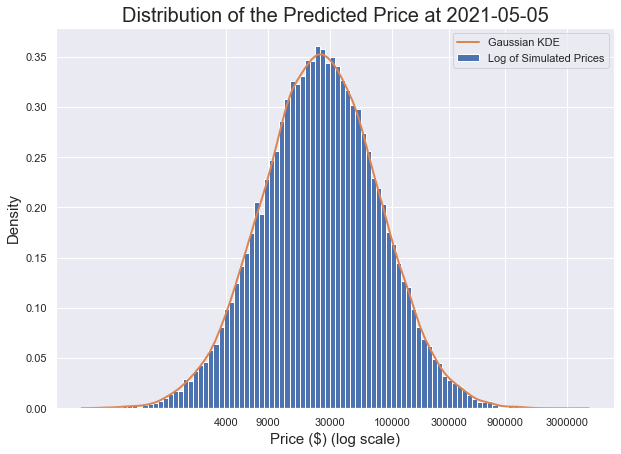

In [80]:
fig, ax = plt.subplots()
ax.hist(np.log(possible_final_prices), bins=100, density=True, label='Log of Simulated Prices')

xticks = plt.xticks()
ticks = [100, 4000, 9000, 30000, 100000, 300000, 900000, 3000000, 9000000]
ax.set_xticks(np.log(ticks))
ax.set_xticklabels([str(tick) for tick in ticks])

kde = gaussian_kde(np.log(possible_final_prices))
x = np.linspace(min(np.log(possible_final_prices)), max(np.log(possible_final_prices)), 100)
ax.plot(x, kde.pdf(x), linewidth=2, label='Gaussian KDE')
ax.legend(loc='upper right')
plt.xlabel('Price ($) (log scale)', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of the Predicted Price at 2021-05-05', size=20)
plt.savefig('simulation_to_today_distribution.eps')

In [81]:
# Get the most likely outcome from the simulation
most_likely_outcome = np.exp(x[np.argmax(kde.pdf(x))])
most_likely_outcome

25904.32643554977

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


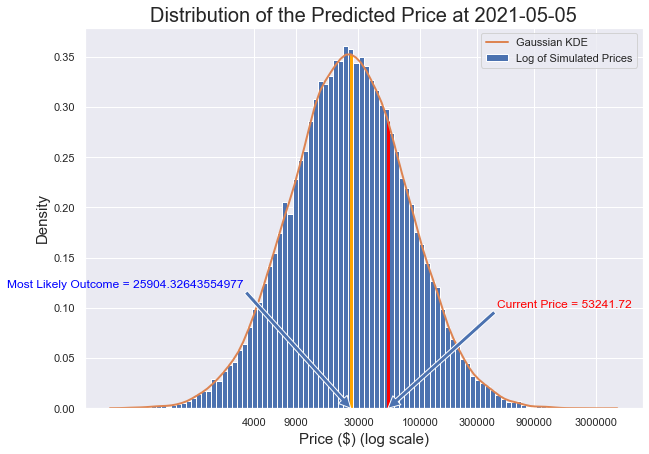

In [90]:
# Drow these two points onto the graph
fig, ax = plt.subplots()
ax.hist(np.log(possible_final_prices), bins=100, density=True, label='Log of Simulated Prices')

xticks = plt.xticks()
ticks = [100, 4000, 9000, 30000, 100000, 300000, 900000, 3000000, 9000000]
ax.set_xticks(np.log(ticks))
ax.set_xticklabels([str(tick) for tick in ticks])

kde = gaussian_kde(np.log(possible_final_prices))
x = np.linspace(min(np.log(possible_final_prices)), max(np.log(possible_final_prices)), 100)
ax.plot(x, kde.pdf(x), linewidth=2, label='Gaussian KDE')
ax.legend(loc='upper right')

ax.vlines(np.log(current), 0, kde.pdf(np.log(current)), linewidth=3, color='red')
ax.vlines(np.log(most_likely_outcome), 0, kde.pdf(np.log(most_likely_outcome)), linewidth=3, color='orange')
ax.annotate('Current Price = ' + str(current), xy=(np.log(current), 0), xytext=(13, 0.1), arrowprops=dict(shrink=0.0), color='red')
ax.annotate('Most Likely Outcome = ' + str(most_likely_outcome), xy=(np.log(most_likely_outcome), 0), xytext=(3.5, 0.12), arrowprops=dict(shrink=0.0), color='blue')

plt.xlabel('Price ($) (log scale)', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of the Predicted Price at 2021-05-05', size=20)
plt.savefig('simulation_to_today_distribution2.eps')

In [91]:
lower = possible_final_prices.quantile(.025)
higher = possible_final_prices.quantile(.975)

In [92]:
lower

2714.3052061234184

In [93]:
higher

222473.13716760074

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


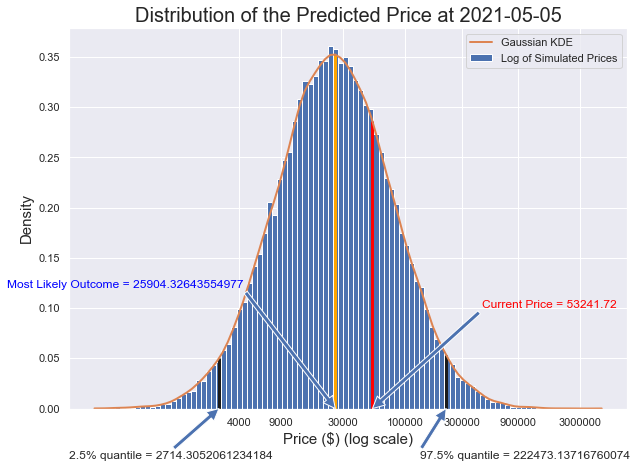

In [97]:
# Drow these two points onto the graph
fig, ax = plt.subplots()
ax.hist(np.log(possible_final_prices), bins=100, density=True, label='Log of Simulated Prices')

xticks = plt.xticks()
ticks = [100, 4000, 9000, 30000, 100000, 300000, 900000, 3000000, 9000000]
ax.set_xticks(np.log(ticks))
ax.set_xticklabels([str(tick) for tick in ticks])

kde = gaussian_kde(np.log(possible_final_prices))
x = np.linspace(min(np.log(possible_final_prices)), max(np.log(possible_final_prices)), 100)
ax.plot(x, kde.pdf(x), linewidth=2, label='Gaussian KDE')
ax.legend(loc='upper right')

ax.vlines(np.log(current), 0, kde.pdf(np.log(current)), linewidth=3, color='red')
ax.vlines(np.log(most_likely_outcome), 0, kde.pdf(np.log(most_likely_outcome)), linewidth=3, color='orange')
ax.vlines(np.log(lower), 0, kde.pdf(np.log(lower)), linewidth=3)
ax.vlines(np.log(higher), 0, kde.pdf(np.log(higher)), linewidth=3)
ax.annotate('Current Price = ' + str(current), xy=(np.log(current), 0), xytext=(13, 0.1), arrowprops=dict(shrink=0.0), color='red')
ax.annotate('Most Likely Outcome = ' + str(most_likely_outcome), xy=(np.log(most_likely_outcome), 0), xytext=(3.8, 0.12), arrowprops=dict(shrink=0.0), color='blue')
ax.annotate('2.5% quantile = ' + str(lower), xy=(np.log(lower), 0), xytext=(5, -0.05), arrowprops=dict(shrink=0.0))
ax.annotate('97.5% quantile = ' + str(higher), xy=(np.log(higher), 0), xytext=(11.8, -0.05), arrowprops=dict(shrink=0.0))

plt.xlabel('Price ($) (log scale)', size=15)
plt.ylabel('Density', size=15)
plt.title('Distribution of the Predicted Price at 2021-05-05', size=20)
plt.savefig('simulation_to_today_distribution3.eps')

In [98]:
future_prices

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
2020-01-01,7222.364806,7218.742517,7246.984740,7060.130924,7251.636910,7264.252701,6689.655692,7129.471680,6787.418804,7349.405444,...,7191.508171,6944.953695,7302.949438,7221.002136,7193.284527,7104.813258,6904.133145,7011.958160,7262.185819,7265.591346
2020-01-02,7086.361242,7710.734195,7379.294416,7065.354276,7251.083122,7426.582370,6539.719548,7126.345288,11083.419734,7319.168789,...,7212.594792,7071.980087,7471.034933,6982.115964,7910.316436,7064.631979,6930.337827,6692.511986,7169.103858,7243.462641
2020-01-03,7093.965329,7737.836464,7224.484044,7187.324459,7432.094007,7398.958913,6631.761794,7131.886975,11240.028410,7150.712671,...,7408.629899,7138.904145,7490.977815,6979.054190,7958.907239,7040.597486,6886.254393,6678.375365,7212.421485,7223.765711
2020-01-04,6818.857012,7338.760961,7235.216132,7258.132625,7437.550848,7404.437797,6672.278447,7108.752219,11861.201967,7118.637867,...,7384.932685,7453.510788,7684.608326,6879.004811,8485.080438,7069.487992,6803.231207,6660.491075,6716.376286,7370.619127
2020-01-05,6792.138226,7204.993084,7344.294526,7260.935826,7740.490659,7320.858002,5792.046672,7077.162444,12001.580432,7200.485461,...,7607.264651,7791.587314,7873.043822,6975.168744,8484.687510,6772.501237,6684.154717,6668.687732,6686.437016,7386.891962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,42352.983198,8772.127296,10856.132641,111566.442831,5115.526871,8347.718391,11337.059702,84373.904704,4417.225192,16726.877655,...,25691.111526,33092.666301,21902.812696,103710.777354,21209.968764,63601.808738,7606.837086,15830.600843,2066.896953,15521.439403
2021-05-02,42635.079968,9408.846107,11071.367990,115102.428450,5268.692462,8407.062361,11102.570158,84205.676209,4490.092158,16684.138263,...,27110.915688,33640.723878,22302.696806,102744.201739,21375.750251,62404.733248,7219.287366,15692.135105,2060.582745,15043.856652
2021-05-03,43986.355726,9196.217703,11184.601781,117127.202080,5356.700230,9245.084540,9654.100764,85877.614371,4790.302135,18082.624760,...,26196.204784,33605.603901,22044.362514,96669.556531,20607.881224,59034.865803,7398.339446,15942.645477,1828.030742,15478.323151
2021-05-04,43635.541018,9088.738168,11203.963102,112542.478664,4980.429047,9552.654950,9548.989114,86025.188018,4804.745296,18063.863432,...,26254.874895,29841.316504,21885.789761,96911.495382,20243.853560,57813.820917,7405.949229,15940.698462,1844.649203,15894.121040


In [99]:
most_likely = []
lower = []
higher = []

for i in range(491):
    price = future_prices.iloc[i, :]
    kde = gaussian_kde(np.log(price))
    x = np.linspace(min(np.log(price)), max(np.log(price)), 100)
    most_likely.append(np.exp(x[np.argmax(kde.pdf(x))]))
    lower.append(price.quantile(.025))
    higher.append(price.quantile(.975))
    if i % 10 == 0:
        print(str(i) + " done")

0 done
10 done
20 done
30 done
40 done
50 done
60 done
70 done
80 done
90 done
100 done
110 done
120 done
130 done
140 done
150 done
160 done
170 done
180 done
190 done
200 done
210 done
220 done
230 done
240 done
250 done
260 done
270 done
280 done
290 done
300 done
310 done
320 done
330 done
340 done
350 done
360 done
370 done
380 done
390 done
400 done
410 done
420 done
430 done
440 done
450 done
460 done
470 done
480 done
490 done


In [100]:
future_prices['most_likely'] = most_likely
future_prices['low'] = lower
future_prices['high'] = higher

In [101]:
future_prices

,0,1,2,3,4,5,6,7,8,9,...,49993,49994,49995,49996,49997,49998,49999,most_likely,low,high
2020-01-01,7222.364806,7218.742517,7246.984740,7060.130924,7251.636910,7264.252701,6689.655692,7129.471680,6787.418804,7349.405444,...,7221.002136,7193.284527,7104.813258,6904.133145,7011.958160,7262.185819,7265.591346,7227.869983,6565.424277,8007.586327
2020-01-02,7086.361242,7710.734195,7379.294416,7065.354276,7251.083122,7426.582370,6539.719548,7126.345288,11083.419734,7319.168789,...,6982.115964,7910.316436,7064.631979,6930.337827,6692.511986,7169.103858,7243.462641,7195.039689,6317.705364,8422.006175
2020-01-03,7093.965329,7737.836464,7224.484044,7187.324459,7432.094007,7398.958913,6631.761794,7131.886975,11240.028410,7150.712671,...,6979.054190,7958.907239,7040.597486,6886.254393,6678.375365,7212.421485,7223.765711,7210.955512,6151.478166,8742.313282
2020-01-04,6818.857012,7338.760961,7235.216132,7258.132625,7437.550848,7404.437797,6672.278447,7108.752219,11861.201967,7118.637867,...,6879.004811,8485.080438,7069.487992,6803.231207,6660.491075,6716.376286,7370.619127,7273.293099,5980.522605,9026.137441
2020-01-05,6792.138226,7204.993084,7344.294526,7260.935826,7740.490659,7320.858002,5792.046672,7077.162444,12001.580432,7200.485461,...,6975.168744,8484.687510,6772.501237,6684.154717,6668.687732,6686.437016,7386.891962,7251.162372,5846.515065,9245.567117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,42352.983198,8772.127296,10856.132641,111566.442831,5115.526871,8347.718391,11337.059702,84373.904704,4417.225192,16726.877655,...,103710.777354,21209.968764,63601.808738,7606.837086,15830.600843,2066.896953,15521.439403,22696.228716,2742.135681,218962.516038
2021-05-02,42635.079968,9408.846107,11071.367990,115102.428450,5268.692462,8407.062361,11102.570158,84205.676209,4490.092158,16684.138263,...,102744.201739,21375.750251,62404.733248,7219.287366,15692.135105,2060.582745,15043.856652,25274.100883,2729.223134,220645.548493
2021-05-03,43986.355726,9196.217703,11184.601781,117127.202080,5356.700230,9245.084540,9654.100764,85877.614371,4790.302135,18082.624760,...,96669.556531,20607.881224,59034.865803,7398.339446,15942.645477,1828.030742,15478.323151,25531.110581,2722.878501,221031.683200
2021-05-04,43635.541018,9088.738168,11203.963102,112542.478664,4980.429047,9552.654950,9548.989114,86025.188018,4804.745296,18063.863432,...,96911.495382,20243.853560,57813.820917,7405.949229,15940.698462,1844.649203,15894.121040,25630.036501,2732.918622,221996.293398


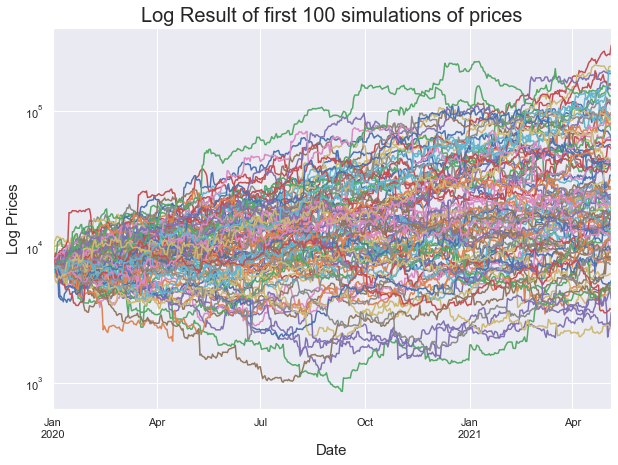

In [102]:
future_prices.iloc[:,:100].plot(legend=False, logy=True, grid=True)


plt.title('Log Result of first 100 simulations of prices', size=20)
plt.xlabel('Date', size=15)
plt.ylabel('Log Prices', size=15)
plt.savefig('simulation_to_today_first100.eps')

In [103]:
future_prices.low

2020-01-01    6565.424277
2020-01-02    6317.705364
2020-01-03    6151.478166
2020-01-04    5980.522605
2020-01-05    5846.515065
                 ...     
2021-05-01    2742.135681
2021-05-02    2729.223134
2021-05-03    2722.878501
2021-05-04    2732.918622
2021-05-05    2714.305206
Freq: D, Name: low, Length: 491, dtype: float64

In [104]:
temp = future_prices[['most_likely', 'low','high']]
temp

,most_likely,low,high
2020-01-01,7227.869983,6565.424277,8007.586327
2020-01-02,7195.039689,6317.705364,8422.006175
2020-01-03,7210.955512,6151.478166,8742.313282
2020-01-04,7273.293099,5980.522605,9026.137441
2020-01-05,7251.162372,5846.515065,9245.567117
...,...,...,...
2021-05-01,22696.228716,2742.135681,218962.516038
2021-05-02,25274.100883,2729.223134,220645.548493
2021-05-03,25531.110581,2722.878501,221031.683200
2021-05-04,25630.036501,2732.918622,221996.293398


In [105]:
to_today = btc[['close']]
to_today['most_likely'] = np.NaN
to_today['most_likely']['2020-01-01':] = future_prices['most_likely']
to_today['low'] = np.NaN
to_today['low']['2020-01-01':] = future_prices['low']
to_today['high'] = np.NaN
to_today['high']['2020-01-01':] = future_prices['high']
to_today

,close,most_likely,low,high
Date,,,,
2012-01-01,5.4999,NaN,NaN,NaN
2012-01-02,5.2900,NaN,NaN,NaN
2012-01-03,5.4500,NaN,NaN,NaN
2012-01-04,6.3990,NaN,NaN,NaN
2012-01-05,7.2200,NaN,NaN,NaN
...,...,...,...,...
2021-05-01,57796.6200,22696.228716,2742.135681,218962.516038
2021-05-02,57857.5000,25274.100883,2729.223134,220645.548493
2021-05-03,56610.4600,25531.110581,2722.878501,221031.683200


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


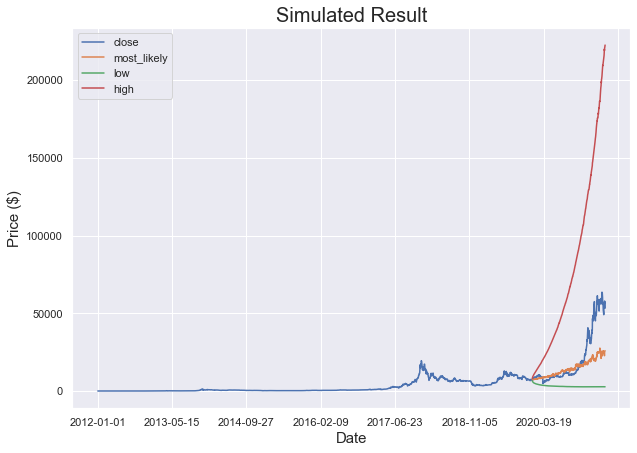

In [106]:
to_today.plot()
plt.xlabel('Date', size=15)
plt.ylabel('Price ($)', size=15)
plt.title('Simulated Result', size=20)
plt.savefig('simulation_to_today_all.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


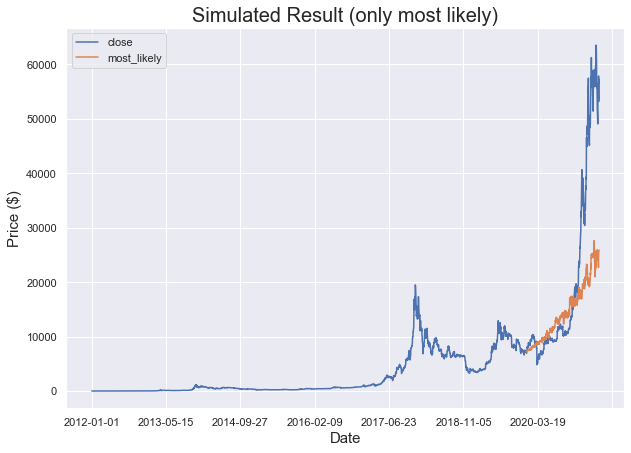

In [107]:
to_today[['close', 'most_likely']].plot()
plt.xlabel('Date', size=15)
plt.ylabel('Price ($)', size=15)
plt.title('Simulated Result (only most likely)', size=20)
plt.savefig('simulation_to_today_most_likely.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


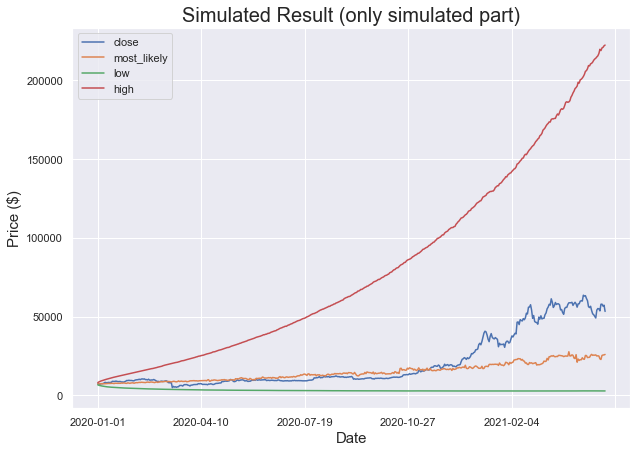

In [108]:
to_today['2020-01-01':].plot()
plt.xlabel('Date', size=15)
plt.ylabel('Price ($)', size=15)
plt.title('Simulated Result (only simulated part)', size=20)
plt.savefig('simulation_to_today_since_2020-01-01.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


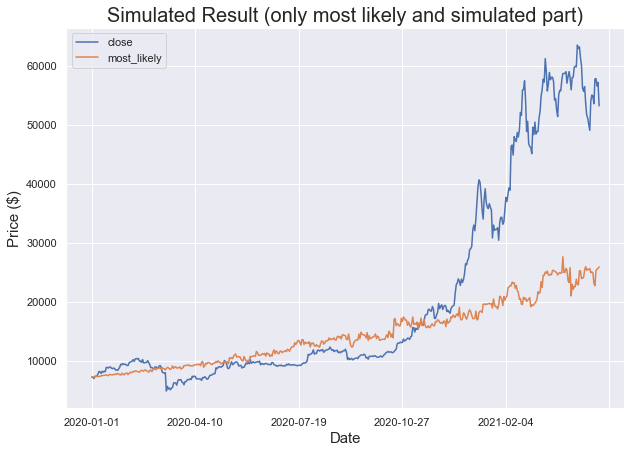

In [109]:
to_today[['close', 'most_likely']]['2020-01-01':].plot()
plt.xlabel('Date', size=15)
plt.ylabel('Price ($)', size=15)
plt.title('Simulated Result (only most likely and simulated part)', size=20)
plt.savefig('simulation_to_today_most_likely_since_2020-01-01.eps')

In [110]:
to_today.to_csv("simulation_to_today_result.csv")

In [111]:
future_prices.to_csv("simulation_to_today_prices.csv")

In [112]:
simulation_result.to_csv("simulation_to_today_return.csv")
cumulative_return.to_csv("simulation_to_today_cumulative.csv")

## Modeling with ARIMA

In [113]:
btc

,close,returns
Date,,
2012-01-01,5.4999,1.230403
2012-01-02,5.2900,0.961836
2012-01-03,5.4500,1.030246
2012-01-04,6.3990,1.174128
2012-01-05,7.2200,1.128301
...,...,...
2021-05-01,57796.6200,1.078614
2021-05-02,57857.5000,1.001053
2021-05-03,56610.4600,0.978446


### Make a Training Dataset

In [114]:
training_set = btc[:'2019-12-31'][['close', 'returns']]
training_set.index = pd.to_datetime(training_set.index)
training_set

,close,returns
Date,,
2012-01-01,5.4999,1.230403
2012-01-02,5.2900,0.961836
2012-01-03,5.4500,1.030246
2012-01-04,6.3990,1.174128
2012-01-05,7.2200,1.128301
...,...,...
2019-12-27,7194.4000,1.000234
2019-12-28,7243.9300,1.006885
2019-12-29,7301.0700,1.007888


## Make a Forecast Set

In [115]:
forecast_set = btc['2020-01-01':][['close', 'returns']]
forecast_set.index = pd.to_datetime(forecast_set.index)
forecast_set

,close,returns
Date,,
2020-01-01,7168.31,0.992896
2020-01-02,7175.68,1.001028
2020-01-03,6944.33,0.967759
2020-01-04,7326.35,1.055012
2020-01-05,7347.89,1.002940
...,...,...
2021-05-01,57796.62,1.078614
2021-05-02,57857.50,1.001053
2021-05-03,56610.46,0.978446


So we can see the first difference is above the critical line.

In [116]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [117]:
warnings.filterwarnings('ignore')

parameters = []
AIC = []
BIC = []

for param in pdq:
    try:
        mod = ARIMA(np.log(training_set.close), order=param)
        results = mod.fit()
        print('ARIMA{} - AIC:{} - BIC:{}'.format(param, results.aic, results.bic))
        parameters.append(param)
        AIC.append(results.aic)
        BIC.append(results.bic)
    except:
        print('bad')

ARIMA(0, 0, 0) - AIC:12934.36644924035 - BIC:12946.32649642497
ARIMA(0, 0, 1) - AIC:9003.374944470037 - BIC:9021.31501524697
ARIMA(0, 0, 2) - AIC:5568.5354325507615 - BIC:5592.455526920004
ARIMA(0, 1, 0) - AIC:-9152.06907931892 - BIC:-9140.109716714145
ARIMA(0, 1, 1) - AIC:-9209.378191242573 - BIC:-9191.43914733541
ARIMA(0, 1, 2) - AIC:-9212.798500592184 - BIC:-9188.879775382633
ARIMA(0, 2, 0) - AIC:-6725.353581846133 - BIC:-6713.394904055609
ARIMA(0, 2, 1) - AIC:-9139.61795770442 - BIC:-9121.679941018634
ARIMA(0, 2, 2) - AIC:-9198.63652511903 - BIC:-9174.71916953798
ARIMA(1, 0, 0) - AIC:-9137.993925083105 - BIC:-9120.053854306172
ARIMA(1, 0, 1) - AIC:-9192.68783573119 - BIC:-9168.767741361948
ARIMA(1, 0, 2) - AIC:-9196.89328725138 - BIC:-9166.993169289826
ARIMA(1, 1, 0) - AIC:-9213.368618642991 - BIC:-9195.429574735828
ARIMA(1, 1, 1) - AIC:-9212.870525116403 - BIC:-9188.951799906852
ARIMA(1, 1, 2) - AIC:-9210.960590797818 - BIC:-9181.06218428588
ARIMA(1, 2, 0) - AIC:-7936.155514790551

In [118]:
models = {
    'dbq':parameters,
    'AIC':AIC,
    'BIC':BIC
}
model_df = pd.DataFrame(models)
model_df.sort_values(by='AIC')

,dbq,AIC,BIC
22,"(2, 1, 1)",-9221.417977,-9191.519571
23,"(2, 1, 2)",-9219.465671,-9183.587584
12,"(1, 1, 0)",-9213.368619,-9195.429575
21,"(2, 1, 0)",-9212.944966,-9189.026241
13,"(1, 1, 1)",-9212.870525,-9188.951800
5,"(0, 1, 2)",-9212.798501,-9188.879775
14,"(1, 1, 2)",-9210.960591,-9181.062184
4,"(0, 1, 1)",-9209.378191,-9191.439147
25,"(2, 2, 1)",-9201.074249,-9171.177554
17,"(1, 2, 2)",-9201.069831,-9171.173136


In [119]:
model_df.to_csv('ARIMA_selection.csv')

The ARIMA(2, 1, 1) has both the scores overall. This is the model we should pick.

In [120]:
mod = ARIMA(np.log(training_set.close), order=(2,1,1))
results = mod.fit(disp = 0)
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 2921
Model:                 ARIMA(2, 1, 1)   Log Likelihood                4615.709
Method:                       css-mle   S.D. of innovations              0.050
Date:                Sun, 09 May 2021   AIC                          -9221.418
Time:                        00:14:47   BIC                          -9191.520
Sample:                    01-02-2012   HQIC                         -9210.649
                         - 12-31-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0025      0.001      2.039      0.041    9.59e-05       0.005
ar.L1.D.close     0.8050      0.029     28.097      0.000       0.749       0.861
ar.L2.D.close     0.1588      0.018     

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


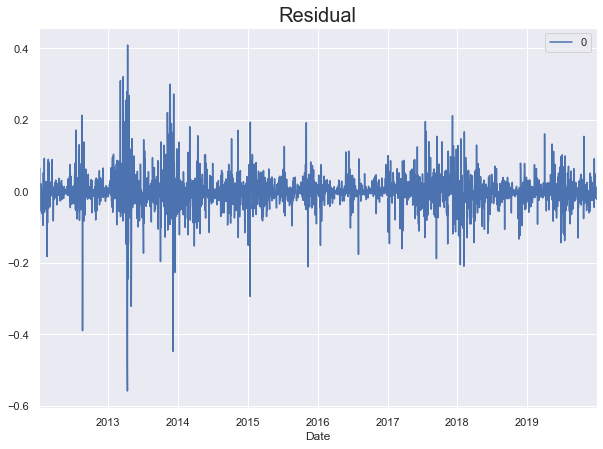

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


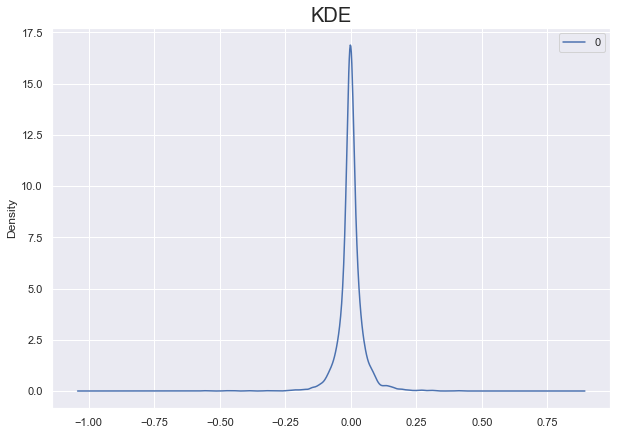

                 0
count  2921.000000
mean     -0.000018
std       0.049840
min      -0.558778
25%      -0.014972
50%      -0.001356
75%       0.015059
max       0.409105


In [121]:
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.title('Residual', size=20)
plt.savefig('ARIMA_results1.eps')
plt.show()
residuals.plot(kind='kde')
plt.title('KDE', size=20)
plt.savefig('ARIMA_results2.eps')
plt.show()
print(residuals.describe())

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


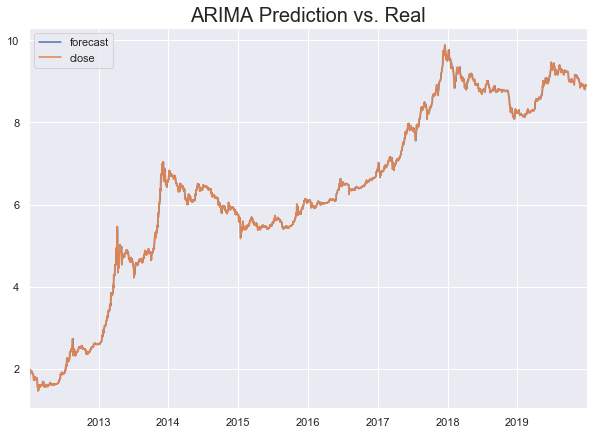

In [122]:
fig = results.plot_predict()
plt.title('ARIMA Prediction vs. Real', size=20)
plt.savefig('ARIMA_prediction_vs_real.eps')

In [123]:
predicted = np.exp(results.predict(typ='levels'))
predicted

2012-01-02       5.513454
2012-01-03       5.335266
2012-01-04       5.437558
2012-01-05       6.269474
2012-01-06       7.139287
                 ...     
2019-12-27    7209.954580
2019-12-28    7202.025161
2019-12-29    7244.825457
2019-12-30    7302.077951
2019-12-31    7383.705911
Freq: D, Length: 2921, dtype: float64

In [124]:
training_set['forecasted_price'] = predicted
training_set

,close,returns,forecasted_price
Date,,,
2012-01-01,5.4999,1.230403,NaN
2012-01-02,5.2900,0.961836,5.513454
2012-01-03,5.4500,1.030246,5.335266
2012-01-04,6.3990,1.174128,5.437558
2012-01-05,7.2200,1.128301,6.269474
...,...,...,...
2019-12-27,7194.4000,1.000234,7209.954580
2019-12-28,7243.9300,1.006885,7202.025161
2019-12-29,7301.0700,1.007888,7244.825457


In [125]:
log_predicted = results.forecast(steps=491)[0]
predicted = np.exp(log_predicted)
forecasted = forecast_set

In [126]:
forecasted

,close,returns
Date,,
2020-01-01,7168.31,0.992896
2020-01-02,7175.68,1.001028
2020-01-03,6944.33,0.967759
2020-01-04,7326.35,1.055012
2020-01-05,7347.89,1.002940
...,...,...
2021-05-01,57796.62,1.078614
2021-05-02,57857.50,1.001053
2021-05-03,56610.46,0.978446


In [127]:
forecasted['forecasted_price'] = predicted

In [128]:
forecasted

,close,returns,forecasted_price
Date,,,
2020-01-01,7168.31,0.992896,7256.119269
2020-01-02,7175.68,1.001028,7260.080682
2020-01-03,6944.33,0.967759,7269.741567
2020-01-04,7326.35,1.055012,7278.807509
2020-01-05,7347.89,1.002940,7288.302304
...,...,...,...
2021-05-01,57796.62,1.078614,23023.833956
2021-05-02,57857.50,1.001053,23080.573666
2021-05-03,56610.46,0.978446,23137.453205


In [129]:
forecasted.to_csv('ARIMA_forecast.csv')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


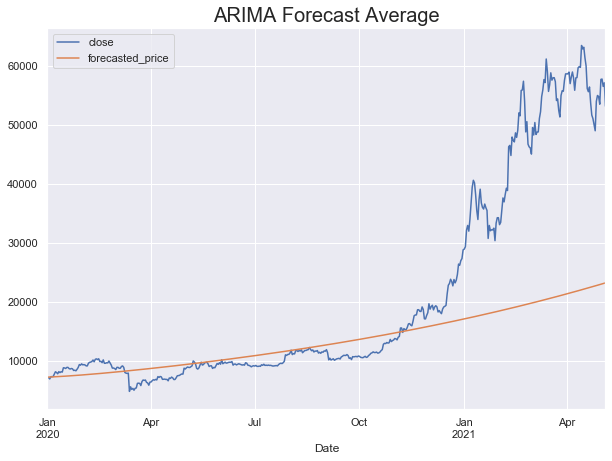

In [130]:
forecasted[['close', 'forecasted_price']].plot()
plt.title('ARIMA Forecast Average', size=20)
plt.savefig('ARIMA_forecast_average.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


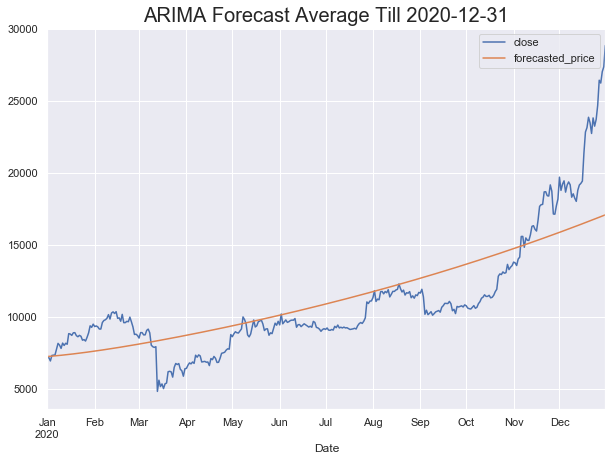

In [131]:
forecasted[:'2020-12-31'][['close', 'forecasted_price']].plot()
plt.title('ARIMA Forecast Average Till 2020-12-31', size=20)
plt.savefig('ARIMA_forecast_average_20201231.eps')

In [132]:
together = pd.concat([training_set, forecasted])
together

,close,returns,forecasted_price
Date,,,
2012-01-01,5.4999,1.230403,NaN
2012-01-02,5.2900,0.961836,5.513454
2012-01-03,5.4500,1.030246,5.335266
2012-01-04,6.3990,1.174128,5.437558
2012-01-05,7.2200,1.128301,6.269474
...,...,...,...
2021-05-01,57796.6200,1.078614,23023.833956
2021-05-02,57857.5000,1.001053,23080.573666
2021-05-03,56610.4600,0.978446,23137.453205


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


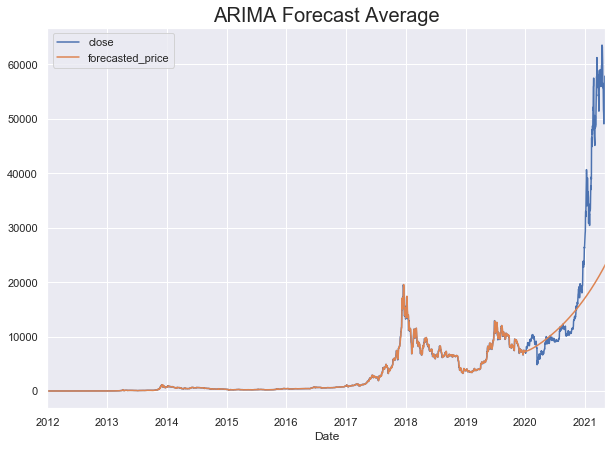

In [133]:
together[['close', 'forecasted_price']].plot()
plt.title('ARIMA Forecast Average', size=20)
plt.savefig('ARIMA_forecast_average_all.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


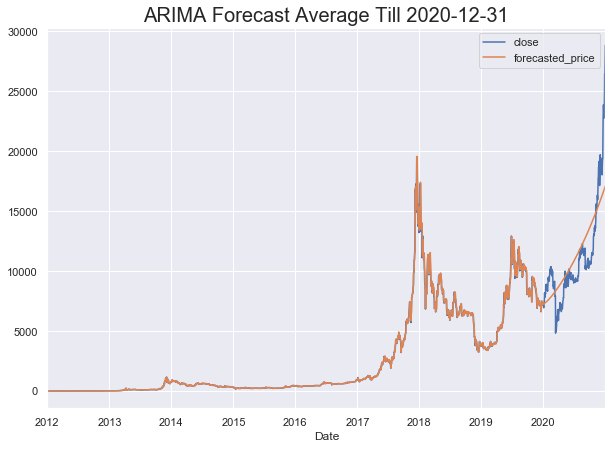

In [134]:
together[:'2020-12-31'][['close', 'forecasted_price']].plot()
plt.title('ARIMA Forecast Average Till 2020-12-31', size=20)
plt.savefig('ARIMA_forecast_average_20201231_all.eps')

### Rolling Forecast

In [135]:
X = training_set.close
X

Date
2012-01-01       5.4999
2012-01-02       5.2900
2012-01-03       5.4500
2012-01-04       6.3990
2012-01-05       7.2200
                ...    
2019-12-27    7194.4000
2019-12-28    7243.9300
2019-12-29    7301.0700
2019-12-30    7385.3600
2019-12-31    7219.6000
Name: close, Length: 2922, dtype: float64

In [136]:
history = [x for x in X]

In [137]:
tests = list(forecast_set.close)

In [138]:
rolling_predictions = []
rolling_low = []
rolling_high = []

In [139]:
for t in range(len(forecast_set)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0][0]
    rolling_predictions.append(yhat)
    rolling_low.append(output[2][0][0])
    rolling_high.append(output[2][0][1])
    obs = tests[t]
    history.append(obs)
    if t % 10 == 0:
        print(t)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490


In [140]:
forecast_set['rolling'] = rolling_predictions
forecast_set['rolling_low'] = rolling_low
forecast_set['rolling_high'] = rolling_high

In [141]:
forecast_set

,close,returns,forecasted_price,rolling,rolling_low,rolling_high
Date,,,,,,
2020-01-01,7168.31,0.992896,7256.119269,7216.758056,6786.859042,7646.657070
2020-01-02,7175.68,1.001028,7260.080682,7161.871373,6732.042341,7591.700405
2020-01-03,6944.33,0.967759,7269.741567,7180.020651,6750.264858,7609.776443
2020-01-04,7326.35,1.055012,7278.807509,6936.039753,6506.272570,7365.806937
2020-01-05,7347.89,1.002940,7288.302304,7337.324665,6907.398368,7767.250963
...,...,...,...,...,...,...
2021-05-01,57796.62,1.078614,23023.833956,53655.517867,52764.393344,54546.642389
2021-05-02,57857.50,1.001053,23080.573666,57757.880868,56856.169164,58659.592572
2021-05-03,56610.46,0.978446,23137.453205,58054.637596,57153.052116,58956.223076


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


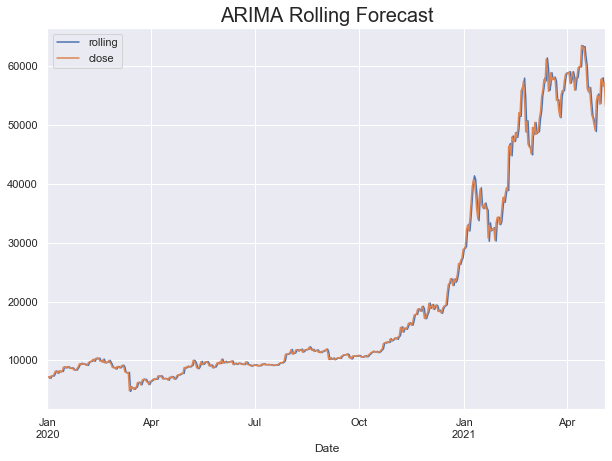

In [142]:
forecast_set[['rolling', 'close']].plot()
plt.title("ARIMA Rolling Forecast", size=20)
plt.savefig('ARIMA_rolling.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


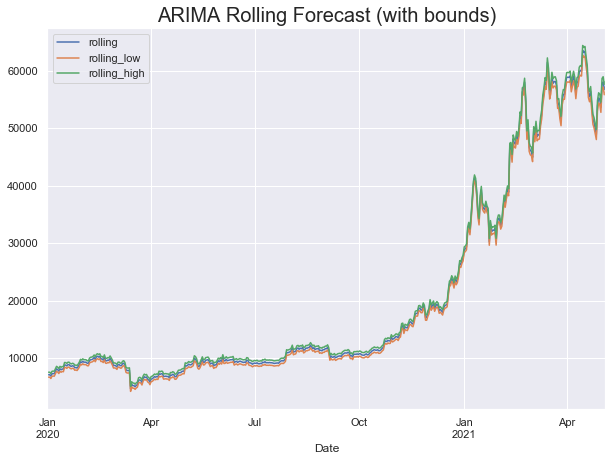

In [143]:
forecast_set[['rolling', 'rolling_low', 'rolling_high']].plot()
plt.title("ARIMA Rolling Forecast (with bounds)", size=20)
plt.savefig('ARIMA_rolling_bounds.eps')